# Лабораторная №4. Ассоциативный анализ

## Загрузка данных

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['figure.facecolor'] = 'white'

In [2]:
all_data = pd.read_csv('groceries - groceries.csv')
all_data # Видно, что датафрейм содержит NaN значения

,Item(s),Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,4,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,17,sausage,chicken,beef,hamburger meat,citrus fruit,grapes,root vegetables,whole milk,butter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9831,1,cooking chocolate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9832,10,chicken,citrus fruit,other vegetables,butter,yogurt,frozen dessert,domestic eggs,rolls/buns,rum,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9833,4,semi-finished bread,bottled water,soda,bottled beer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
np_data = all_data.to_numpy()
np_data = [[elem for elem in row[1:] if isinstance(elem,str)] for row in
np_data]

In [4]:
unique_items = set()
for row in np_data:
    for elem in row:
        unique_items.add(elem)


Выведем список всех товаров, а также их количество.

In [5]:
unique_items

{'Instant food products',
 'UHT-milk',
 'abrasive cleaner',
 'artif. sweetener',
 'baby cosmetics',
 'baby food',
 'bags',
 'baking powder',
 'bathroom cleaner',
 'beef',
 'berries',
 'beverages',
 'bottled beer',
 'bottled water',
 'brandy',
 'brown bread',
 'butter',
 'butter milk',
 'cake bar',
 'candles',
 'candy',
 'canned beer',
 'canned fish',
 'canned fruit',
 'canned vegetables',
 'cat food',
 'cereals',
 'chewing gum',
 'chicken',
 'chocolate',
 'chocolate marshmallow',
 'citrus fruit',
 'cleaner',
 'cling film/bags',
 'cocoa drinks',
 'coffee',
 'condensed milk',
 'cooking chocolate',
 'cookware',
 'cream',
 'cream cheese',
 'curd',
 'curd cheese',
 'decalcifier',
 'dental care',
 'dessert',
 'detergent',
 'dish cleaner',
 'dishes',
 'dog food',
 'domestic eggs',
 'female sanitary products',
 'finished products',
 'fish',
 'flour',
 'flower (seeds)',
 'flower soil/fertilizer',
 'frankfurter',
 'frozen chicken',
 'frozen dessert',
 'frozen fish',
 'frozen fruits',
 'frozen me

In [6]:
len(unique_items)

169

## FPGrowth и FPMax

In [7]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(np_data).transform(np_data)
data = pd.DataFrame(te_ary, columns=te.columns_)

In [8]:
from mlxtend.frequent_patterns import fpgrowth
from IPython.core.display import display

result = fpgrowth(data, min_support=0.03, use_colnames = True)
with pd.option_context('display.max_rows', None):
    display(result)

,support,itemsets
0,0.082766,(citrus fruit)
1,0.058566,(margarine)
2,0.139502,(yogurt)
3,0.104931,(tropical fruit)
4,0.058058,(coffee)
5,0.255516,(whole milk)
6,0.075648,(pip fruit)
7,0.039654,(cream cheese)
8,0.193493,(other vegetables)
9,0.037417,(long life bakery product)


Определим минимальное и максимальное значения для уровня поддержки для набора из 1,2, и.т.д. объектов.

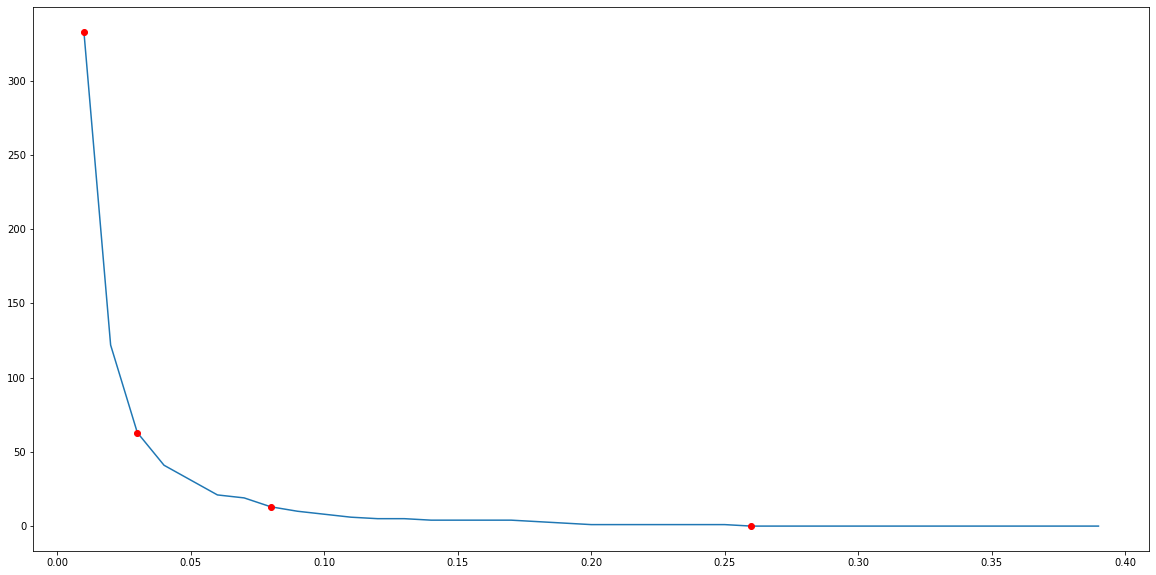

In [9]:
min_support_range = np.arange(0.01, 0.4, 0.01)
from math import isnan

itemsets_lengths = []
threshold_supports = []
threshold_lengths = []

last_itemset_len = len(data.columns)

for min_support in min_support_range:
    results = fpgrowth(data, min_support=min_support, use_colnames=True)
    itemsets_lengths.append(len(results))

    results['length'] = results['itemsets'].apply(lambda x: len(x))
    current_itemset_max_len = results['length'].max()

    if isnan(current_itemset_max_len):
        current_itemset_max_len = 0

    if current_itemset_max_len < last_itemset_len:
        last_itemset_len = current_itemset_max_len
        threshold_supports.append(min_support)
        threshold_lengths.append(len(results))

plt.figure()

plt.plot(min_support_range.tolist(), itemsets_lengths)
plt.plot(threshold_supports, threshold_lengths, 'ro')

plt.show()

На графике показано количество наборов в зависимости от минимального порога.
Точками обозначены моменты, когда перестают генерироваться наборы определенной
длины - 3, 2, 1.

Проведём аналогичный анализ используя алгоритм FPMax.

In [10]:
from mlxtend.frequent_patterns import fpmax

result = fpmax(data, min_support=0.03, use_colnames = True)
with pd.option_context('display.max_rows', None):
    display(result)

,support,itemsets
0,0.030402,(specialty chocolate)
1,0.031012,(onions)
2,0.032944,(hygiene articles)
3,0.033249,(berries)
4,0.033249,(hamburger meat)
5,0.033452,(UHT-milk)
6,0.033859,(sugar)
7,0.037112,(dessert)
8,0.037417,(long life bakery product)
9,0.037824,(salty snack)


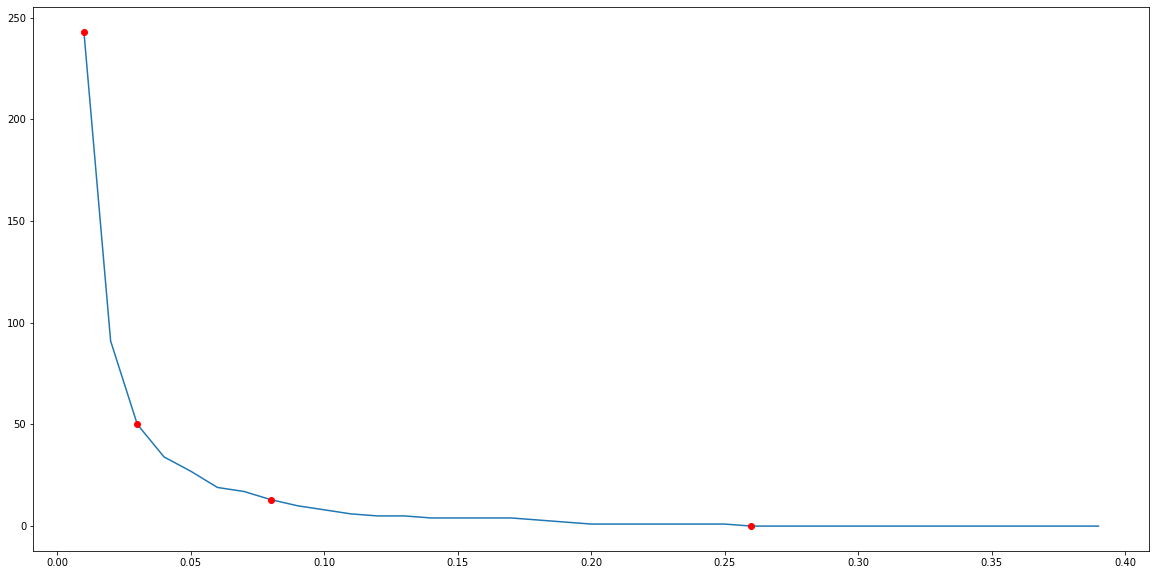

In [11]:
min_support_range = np.arange(0.01, 0.4, 0.01)

itemsets_lengths = []
threshold_supports = []
threshold_lengths = []

last_itemset_len = len(data.columns)

for min_support in min_support_range:
    results = fpmax(data, min_support=min_support, use_colnames=True)
    itemsets_lengths.append(len(results))

    results['length'] = results['itemsets'].apply(lambda x: len(x))
    current_itemset_max_len = results['length'].max()

    if isnan(current_itemset_max_len):
        current_itemset_max_len = 0

    if current_itemset_max_len < last_itemset_len:
        last_itemset_len = current_itemset_max_len
        threshold_supports.append(min_support)
        threshold_lengths.append(len(results))

plt.figure()

plt.plot(min_support_range.tolist(), itemsets_lengths)
plt.plot(threshold_supports, threshold_lengths, 'ro')

plt.show()

Сравним полученные результаты для FPGrowth и FPMax. Разница между FPMax и FPGrowth
заключается в том, что алгоритм FPMax выводит только "максимальные" наборы.
Максимальный набор - это такой набор, который является частым (т.е. умеет уровень
поддержки больше, чем минимальная граница) и при этом не является поднабором для
другого частого набора. Например, у нас есть частый набор (X, Y), и частый набор
(X). При этом (Х, Y) - максимальный набор, а (X) - нет, так как является частью
частого набора (X, Y). Из этого следует, что FPGrowth выведет оба набора, а FPMax
\- нет.

В случае данного датасета можно увидеть разницу на примере наборов `(soda)` и
`(whole milk, soda)`. В FPGrowth - есть оба этих набора, а в FPMax - только
последний.

Построим гистограмму для каждого товара. Столбцы на гистограмме
упорядочены по уменьшению частоты. Отобразим результат только для 10 самых
встречаемых товаров.

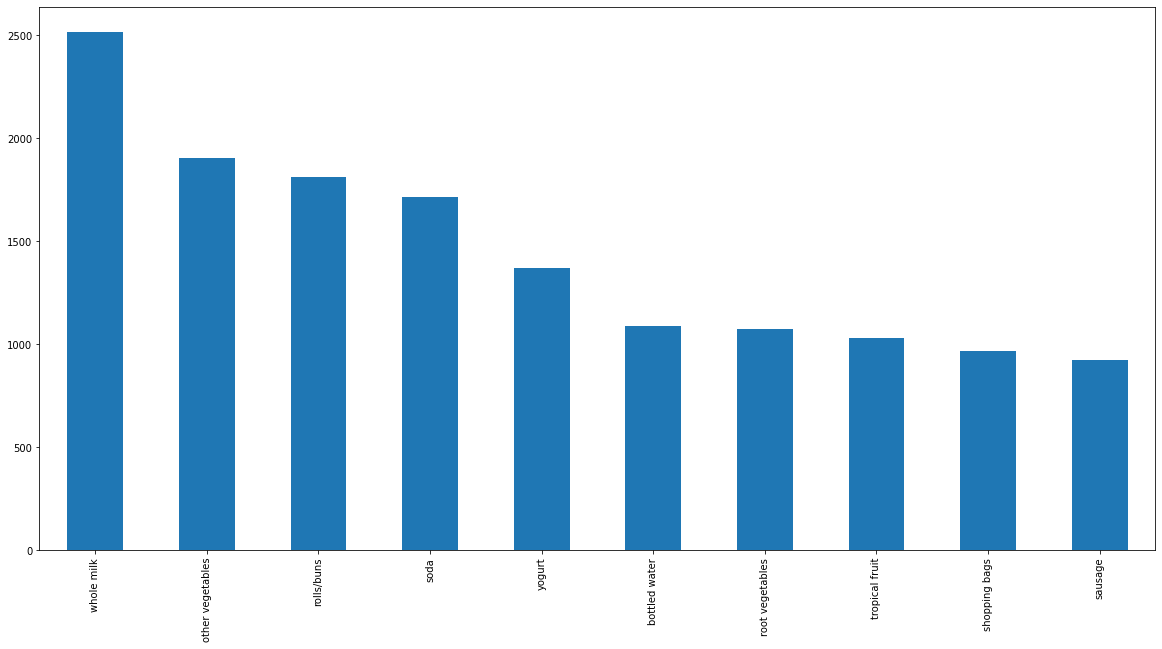

In [12]:
plt.figure()

items_sum = data.sum()
items_sum.nlargest(10).plot.bar()

plt.show()

Наиболее часто встречающихся элементы на данной гистограмме имеют наиболее
высокий уровень поддержки в наборе из одного элемента.

Преобразуем набор данных, чтобы он содержал ограниченный набор товаров

In [13]:
items = [
    'whole milk', 'yogurt', 'soda', 'tropical fruit', 'shopping bags',
    'sausage', 'whipped/sour cream', 'rolls/buns', 'other vegetables',
    'root vegetables', 'pork', 'bottled water', 'pastry', 'citrus fruit',
    'canned beer', 'bottled beer'
]
np_data = all_data.to_numpy()
np_data = [[elem for elem in row[1:] if isinstance(elem,str) and elem in
items] for row in np_data]

Проведём анализ FPGrowth и FPMax для нового набора данных.

In [14]:
te = TransactionEncoder()
te_ary = te.fit(np_data).transform(np_data)
data = pd.DataFrame(te_ary, columns=te.columns_)

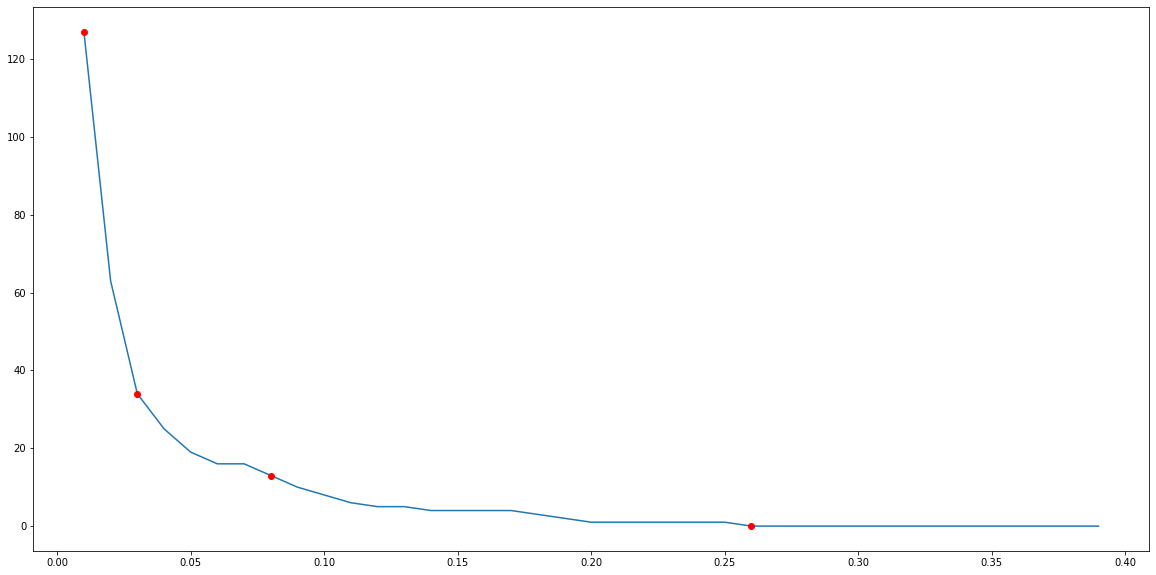

In [15]:
min_support_range = np.arange(0.01, 0.4, 0.01)

itemsets_lengths = []
threshold_supports = []
threshold_lengths = []

last_itemset_len = len(data.columns)

for min_support in min_support_range:
    results = fpgrowth(data, min_support=min_support, use_colnames=True)
    itemsets_lengths.append(len(results))

    results['length'] = results['itemsets'].apply(lambda x: len(x))
    current_itemset_max_len = results['length'].max()

    if isnan(current_itemset_max_len):
        current_itemset_max_len = 0

    if current_itemset_max_len < last_itemset_len:
        last_itemset_len = current_itemset_max_len
        threshold_supports.append(min_support)
        threshold_lengths.append(len(results))

plt.figure()

plt.plot(min_support_range.tolist(), itemsets_lengths)
plt.plot(threshold_supports, threshold_lengths, 'ro')

plt.show()

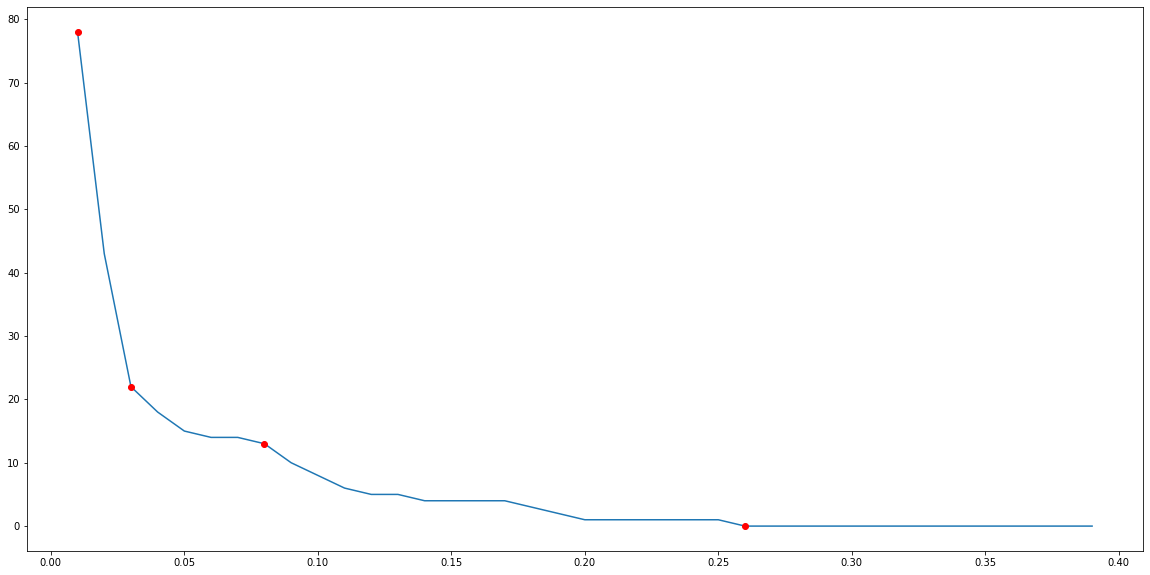

In [16]:

min_support_range = np.arange(0.01, 0.4, 0.01)

itemsets_lengths = []
threshold_supports = []
threshold_lengths = []

last_itemset_len = len(data.columns)

for min_support in min_support_range:
    results = fpmax(data, min_support=min_support, use_colnames=True)
    itemsets_lengths.append(len(results))

    results['length'] = results['itemsets'].apply(lambda x: len(x))
    current_itemset_max_len = results['length'].max()

    if isnan(current_itemset_max_len):
        current_itemset_max_len = 0

    if current_itemset_max_len < last_itemset_len:
        last_itemset_len = current_itemset_max_len
        threshold_supports.append(min_support)
        threshold_lengths.append(len(results))

plt.figure()

plt.plot(min_support_range.tolist(), itemsets_lengths)
plt.plot(threshold_supports, threshold_lengths, 'ro')

plt.show()

Графики двух методов стали отличаться существенней между собой по характеру линии,
чем на всем датасете.

## Ассоциативные правила

Сформируем набор данных из определенных товаров и так, чтобы размер транзакции был 2
и более

In [17]:
np_data = all_data.to_numpy()
np_data = [[elem for elem in row[1:] if isinstance(elem,str) and elem in
items] for row in np_data]
np_data = [row for row in np_data if len(row) > 1]

te = TransactionEncoder()
te_ary = te.fit(np_data).transform(np_data)
data = pd.DataFrame(te_ary, columns=te.columns_)

Получим частоты наборов используя алгоритм FPGrowth

In [18]:
result = fpgrowth(data, min_support=0.05, use_colnames = True)
result

,support,itemsets
0,0.241240,(yogurt)
1,0.185864,(tropical fruit)
2,0.421869,(whole milk)
3,0.335079,(other vegetables)
4,0.296214,(rolls/buns)
5,0.113371,(bottled beer)
6,0.185461,(bottled water)
7,0.146395,(citrus fruit)
8,0.267217,(soda)
9,0.196335,(root vegetables)


Проведем [ассоциативный анализ](http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/)

In [19]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(result, min_threshold = 0.3)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(yogurt),(whole milk),0.241240,0.421869,0.110954,0.459933,1.090228,0.009183,1.070481
1,(yogurt),(other vegetables),0.241240,0.335079,0.085985,0.356427,1.063713,0.005150,1.033172
2,(tropical fruit),(yogurt),0.185864,0.241240,0.057994,0.312026,1.293423,0.013156,1.102890
3,(tropical fruit),(other vegetables),0.185864,0.335079,0.071083,0.382449,1.141370,0.008804,1.076706
4,(tropical fruit),(whole milk),0.185864,0.421869,0.083770,0.450704,1.068352,0.005359,1.052495
5,(whole milk),(other vegetables),0.421869,0.335079,0.148208,0.351313,1.048449,0.006849,1.025026
6,(other vegetables),(whole milk),0.335079,0.421869,0.148208,0.442308,1.048449,0.006849,1.036649
7,(rolls/buns),(whole milk),0.296214,0.421869,0.112163,0.378654,0.897564,-0.012801,0.930450
8,(bottled water),(whole milk),0.185461,0.421869,0.068063,0.366992,0.869921,-0.010177,0.913309
9,(bottled water),(soda),0.185461,0.267217,0.057390,0.309446,1.158033,0.007832,1.061153


Ассоциативное правило X -> Y, где Х и Y - части наборов полученных с
помощью алгоритмов FPGrowth и т.д.

- antecedents - Х в данном правиле
- consequents - Y в данном правиле
- antecedent support - уровень поддержки для набора X
- consequent support - уровень поддержки для набора Y
- support - у.п. для X ∪ Y (т.е. объединенного набора)
- confidence - вероятность увидеть в транзакцкии Y, если там уже есть Х
- lift - насколько чаще X и Y появляются вместе, чем если бы мы предположили
  что они являются статистически независимы
- leverage - разница между частотой появления X и Y вместе и между частой
  их появления, если бы мы предположили, что они независимы
- conviction - уровень зависимости Y от X. Чем выше значение, тем больше
  зависимость

Расчет проводился из метрики confidence, так как это параметр по-умолчанию.

Проведём построение ассоциативных правил для различных метрик.
Рассчитаем среднее значение, медиану и СКО для каждой из метрик.

In [20]:
rules = association_rules(result, metric='support', min_threshold = 0.08)
display(rules)
rules.describe()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(yogurt),(whole milk),0.241240,0.421869,0.110954,0.459933,1.090228,0.009183,1.070481
1,(whole milk),(yogurt),0.421869,0.241240,0.110954,0.263007,1.090228,0.009183,1.029535
2,(yogurt),(other vegetables),0.241240,0.335079,0.085985,0.356427,1.063713,0.005150,1.033172
3,(other vegetables),(yogurt),0.335079,0.241240,0.085985,0.256611,1.063713,0.005150,1.020676
4,(whole milk),(tropical fruit),0.421869,0.185864,0.083770,0.198568,1.068352,0.005359,1.015852
5,(tropical fruit),(whole milk),0.185864,0.421869,0.083770,0.450704,1.068352,0.005359,1.052495
6,(whole milk),(other vegetables),0.421869,0.335079,0.148208,0.351313,1.048449,0.006849,1.025026
7,(other vegetables),(whole milk),0.335079,0.421869,0.148208,0.442308,1.048449,0.006849,1.036649
8,(rolls/buns),(other vegetables),0.296214,0.335079,0.084374,0.284840,0.850070,-0.014881,0.929752
9,(other vegetables),(rolls/buns),0.335079,0.296214,0.084374,0.251803,0.850070,-0.014881,0.940642


,antecedent support,consequent support,support,confidence,lift,leverage,conviction
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,0.318944,0.318944,0.102019,0.340060,1.076769,0.005118,1.038598
std,0.087519,0.087519,0.021012,0.098835,0.169524,0.013396,0.087058
min,0.185864,0.185864,0.083770,0.198568,0.850070,-0.014881,0.929752
25%,0.241240,0.241240,0.085582,0.261408,1.010727,0.000662,1.001556
50%,0.335079,0.335079,0.095348,0.318076,1.066032,0.006104,1.031353
75%,0.421869,0.421869,0.111257,0.444407,1.110021,0.010395,1.056992
max,0.421869,0.421869,0.148208,0.493333,1.426378,0.028050,1.273671


In [21]:
rules = association_rules(result, metric='lift', min_threshold = 1.16)
display(rules)
rules.describe()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(yogurt),(tropical fruit),0.241240,0.185864,0.057994,0.240401,1.293423,0.013156,1.071797
1,(tropical fruit),(yogurt),0.185864,0.241240,0.057994,0.312026,1.293423,0.013156,1.102890
2,(citrus fruit),(other vegetables),0.146395,0.335079,0.057189,0.390646,1.165836,0.008135,1.091192
3,(other vegetables),(citrus fruit),0.335079,0.146395,0.057189,0.170673,1.165836,0.008135,1.029274
4,(root vegetables),(other vegetables),0.196335,0.335079,0.093838,0.477949,1.426378,0.028050,1.273671
5,(other vegetables),(root vegetables),0.335079,0.196335,0.093838,0.280048,1.426378,0.028050,1.116276
6,(root vegetables),(whole milk),0.196335,0.421869,0.096859,0.493333,1.169400,0.014031,1.141049
7,(whole milk),(root vegetables),0.421869,0.196335,0.096859,0.229594,1.169400,0.014031,1.043171
8,(sausage),(rolls/buns),0.167539,0.296214,0.060612,0.361779,1.221342,0.010985,1.102730
9,(rolls/buns),(sausage),0.296214,0.167539,0.060612,0.204623,1.221342,0.010985,1.046624


,antecedent support,consequent support,support,confidence,lift,leverage,conviction
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,0.251956,0.251956,0.069645,0.318366,1.266846,0.014476,1.109112
std,0.104509,0.104509,0.017040,0.130518,0.097460,0.006191,0.075876
min,0.124245,0.124245,0.057189,0.151313,1.165836,0.008135,1.029274
25%,0.172120,0.172120,0.057390,0.210866,1.181515,0.011093,1.048964
50%,0.218788,0.218788,0.060612,0.296037,1.221342,0.013156,1.096961
75%,0.335079,0.335079,0.086337,0.442880,1.353618,0.015176,1.134855
max,0.421869,0.421869,0.096859,0.513776,1.426378,0.028050,1.273671


In [22]:
rules = association_rules(result, metric='leverage', min_threshold = 0.01)
display(rules)
rules.describe()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(yogurt),(tropical fruit),0.241240,0.185864,0.057994,0.240401,1.293423,0.013156,1.071797
1,(tropical fruit),(yogurt),0.185864,0.241240,0.057994,0.312026,1.293423,0.013156,1.102890
2,(root vegetables),(other vegetables),0.196335,0.335079,0.093838,0.477949,1.426378,0.028050,1.273671
3,(other vegetables),(root vegetables),0.335079,0.196335,0.093838,0.280048,1.426378,0.028050,1.116276
4,(root vegetables),(whole milk),0.196335,0.421869,0.096859,0.493333,1.169400,0.014031,1.141049
5,(whole milk),(root vegetables),0.421869,0.196335,0.096859,0.229594,1.169400,0.014031,1.043171
6,(sausage),(rolls/buns),0.167539,0.296214,0.060612,0.361779,1.221342,0.010985,1.102730
7,(rolls/buns),(sausage),0.296214,0.167539,0.060612,0.204623,1.221342,0.010985,1.046624
8,(whole milk),(whipped/sour cream),0.421869,0.124245,0.063834,0.151313,1.217858,0.011419,1.031894
9,(whipped/sour cream),(whole milk),0.124245,0.421869,0.063834,0.513776,1.217858,0.011419,1.189023


,antecedent support,consequent support,support,confidence,lift,leverage,conviction
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,0.253826,0.253826,0.071721,0.324651,1.283681,0.015533,1.117259
std,0.106127,0.106127,0.017613,0.132783,0.095190,0.006063,0.078249
min,0.124245,0.124245,0.057189,0.151313,1.169400,0.010985,1.031894
25%,0.181283,0.181283,0.057994,0.223351,1.217858,0.011419,1.053643
50%,0.218788,0.218788,0.062223,0.296037,1.257383,0.013594,1.102810
75%,0.335079,0.335079,0.093838,0.464706,1.373683,0.015557,1.153042
max,0.421869,0.421869,0.096859,0.513776,1.426378,0.028050,1.273671


In [23]:
rules = association_rules(result, metric='conviction', min_threshold = 1.05)
display(rules)
rules.describe()


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(yogurt),(whole milk),0.241240,0.421869,0.110954,0.459933,1.090228,0.009183,1.070481
1,(yogurt),(tropical fruit),0.241240,0.185864,0.057994,0.240401,1.293423,0.013156,1.071797
2,(tropical fruit),(yogurt),0.185864,0.241240,0.057994,0.312026,1.293423,0.013156,1.102890
3,(tropical fruit),(other vegetables),0.185864,0.335079,0.071083,0.382449,1.141370,0.008804,1.076706
4,(tropical fruit),(whole milk),0.185864,0.421869,0.083770,0.450704,1.068352,0.005359,1.052495
5,(bottled water),(soda),0.185461,0.267217,0.057390,0.309446,1.158033,0.007832,1.061153
6,(citrus fruit),(other vegetables),0.146395,0.335079,0.057189,0.390646,1.165836,0.008135,1.091192
7,(root vegetables),(other vegetables),0.196335,0.335079,0.093838,0.477949,1.426378,0.028050,1.273671
8,(other vegetables),(root vegetables),0.335079,0.196335,0.093838,0.280048,1.426378,0.028050,1.116276
9,(root vegetables),(whole milk),0.196335,0.421869,0.096859,0.493333,1.169400,0.014031,1.141049


,antecedent support,consequent support,support,confidence,lift,leverage,conviction
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,0.203628,0.309922,0.072838,0.378818,1.244242,0.013520,1.116961
std,0.065605,0.096936,0.018972,0.104328,0.121001,0.006855,0.068747
min,0.124245,0.124245,0.057189,0.170673,1.068352,0.005359,1.052495
25%,0.172020,0.247735,0.057541,0.310091,1.159984,0.008899,1.070810
50%,0.185864,0.335079,0.062223,0.386548,1.219600,0.012288,1.096961
75%,0.230014,0.400171,0.091321,0.460202,1.353618,0.015176,1.134855
max,0.335079,0.421869,0.110954,0.513776,1.426378,0.028050,1.273671


Построим граф для следующего анализа:

In [24]:
rules = association_rules(result, min_threshold = 0.4, metric='confidence')
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(yogurt),(whole milk),0.241240,0.421869,0.110954,0.459933,1.090228,0.009183,1.070481
1,(tropical fruit),(whole milk),0.185864,0.421869,0.083770,0.450704,1.068352,0.005359,1.052495
2,(other vegetables),(whole milk),0.335079,0.421869,0.148208,0.442308,1.048449,0.006849,1.036649
3,(citrus fruit),(whole milk),0.146395,0.421869,0.060411,0.412655,0.978159,-0.001349,0.984313
4,(root vegetables),(other vegetables),0.196335,0.335079,0.093838,0.477949,1.426378,0.028050,1.273671
5,(root vegetables),(whole milk),0.196335,0.421869,0.096859,0.493333,1.169400,0.014031,1.141049
6,(whipped/sour cream),(whole milk),0.124245,0.421869,0.063834,0.513776,1.217858,0.011419,1.189023
7,(whipped/sour cream),(other vegetables),0.124245,0.335079,0.057189,0.460292,1.373683,0.015557,1.232002
8,(pastry),(whole milk),0.150624,0.421869,0.065848,0.437166,1.036260,0.002304,1.027179


Каждая вершина графа отображает набор товаров. Граф
ориентирован от антецедента к консеквенту. Ширина ребра
отображает уровень support, а подпись на ребре отображает confidence.

Для отрисовки графа используем библиотеку [NetworkX](https://networkx.org/documentation/stable/install.html)

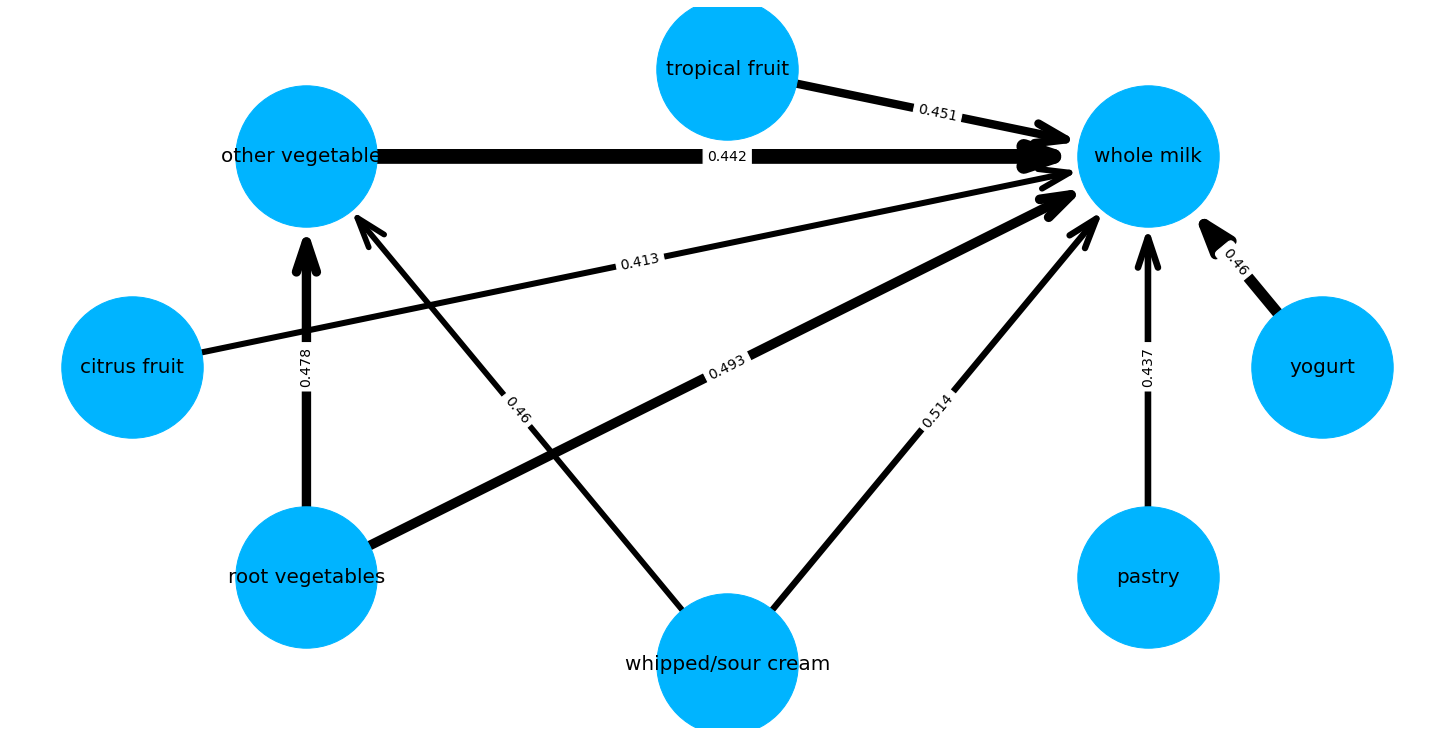

In [25]:
from matplotlib.patches import ArrowStyle

import networkx as nx

digraph = nx.DiGraph()
for i in range(rules.shape[0]):
    digraph.add_edge(
        rules.iloc[i].antecedents,
        rules.iloc[i].consequents,
        weight=rules.iloc[i].support,
        label=round(rules.iloc[i].confidence,3)
    )

pos = nx.circular_layout(digraph)
nx.draw(
    digraph,
    pos,
    labels={node: ','.join(node) for node in digraph.nodes()},
    width=[digraph[u][v]['weight']*100 for u,v in digraph.edges()],
    arrowstyle=ArrowStyle.CurveB(head_length=3, head_width=1),
    node_size=20000,
    node_color='#00b4ff',
    font_size=20
)
nx.draw_networkx_edge_labels(
    digraph,
    pos,
    edge_labels=nx.get_edge_attributes(digraph, 'label'),
    font_size=14
)
plt.show()

Граф позволяет более наглядно (иногда) представить результаты анализа.
На данном графе, например, видны связи продуктов между собой. Из результатов
можно сделать вывод, что у всех продуктов между собой слабая взаимосвязь,
так как вероятность появления одного, при условии наличия другого меньше
0.5.

То насколько хороший способ представления данных, зависит от того, что
именно мы хотели узнать при его выборе. Для данной задачи на мой взгляд
можно использовать и граф, но помечать ребра цветом в зависимости от
значения confidence (от красного до зеленого или еще как-нибудь).
Можно задействовать и толщину, но главное, чтобы на графе не смешивались
величины (т.е. support можно убрать) или были правильно расставлены акценты
и цифрами писались второстепенные величины, а цветом и толщиной - важные
и те, чье точное значение нам неизвестно. Также неплохо бы под графом
оформлять легенду.
